# Importación de librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Importación del dasaset

In [5]:
df0 = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
df0.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


# EDA

## Información de los datos

In [6]:
df0.shape

(3140, 108)

In [7]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [8]:
# Muchas columnas, hace resumen. Mostrar todo pasar el argumento "verbose" en "True"
df0.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 108 columns):
 #    Column                                                                         Dtype  
---   ------                                                                         -----  
 0    fips                                                                           int64  
 1    TOT_POP                                                                        int64  
 2    0-9                                                                            int64  
 3    0-9 y/o % of total pop                                                         float64
 4    19-Oct                                                                         int64  
 5    10-19 y/o % of total pop                                                       float64
 6    20-29                                                                          int64  
 7    20-29 y/o % of total pop                         

In [9]:
df0.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


## Limpieza Inicial

### Eliminar Duplicados

In [10]:
df0 = df0.drop_duplicates()
df0.shape

(3140, 108)

### Eliminar información Irrelevante

In [28]:
# hay bastante información 107 columnas
# para el ejercicio se acota la información demográfica así:
#   Demográfica: Por rango de edades (sin porcentajes)
#   recursos sanitarios: prevalencia de enfermedades (sin porcentajes y sin prevalencia)
df=df0[["0-9", "19-Oct", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+","anycondition_number","Heart disease_number","diabetes_number","CKD_number"]]
df.head()

,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,anycondition_number,Heart disease_number,diabetes_number,CKD_number
0,6787,7637,6878,7089,7582,7738,5826,4050,2014,20181,3345,5462,1326
1,24757,26913,23579,25213,27338,29986,29932,20936,9368,68790,13414,20520,5479
2,2732,2960,3268,3201,3074,3278,3076,2244,1048,11325,2159,3870,887
3,2456,2596,3029,3113,3038,3115,2545,1723,785,9190,1533,2511,595
4,7095,7570,6742,6884,7474,7844,6965,4931,2335,20584,4101,6017,1507


In [29]:
# se renombra 19-Oct, que se tomó como fecha pero es rango de 10 a 19 años y quitarle "number" a las variables objeto
df = df.rename(columns={'19-Oct':'10-19','anycondition_number':'Anycondition', 'Heart disease_number':'Heart disease', 'diabetes_number':'Diabetes', 'CKD_number':'CKD'})
df.head()

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,Anycondition,Heart disease,Diabetes,CKD
0,6787,7637,6878,7089,7582,7738,5826,4050,2014,20181,3345,5462,1326
1,24757,26913,23579,25213,27338,29986,29932,20936,9368,68790,13414,20520,5479
2,2732,2960,3268,3201,3074,3278,3076,2244,1048,11325,2159,3870,887
3,2456,2596,3029,3113,3038,3115,2545,1723,785,9190,1533,2511,595
4,7095,7570,6742,6884,7474,7844,6965,4931,2335,20584,4101,6017,1507


## Análisis de variables univariantes

### Variables Categóricas

In [ ]:
#no hay variables categóricas, todas son númericas

### Variables Numéricas

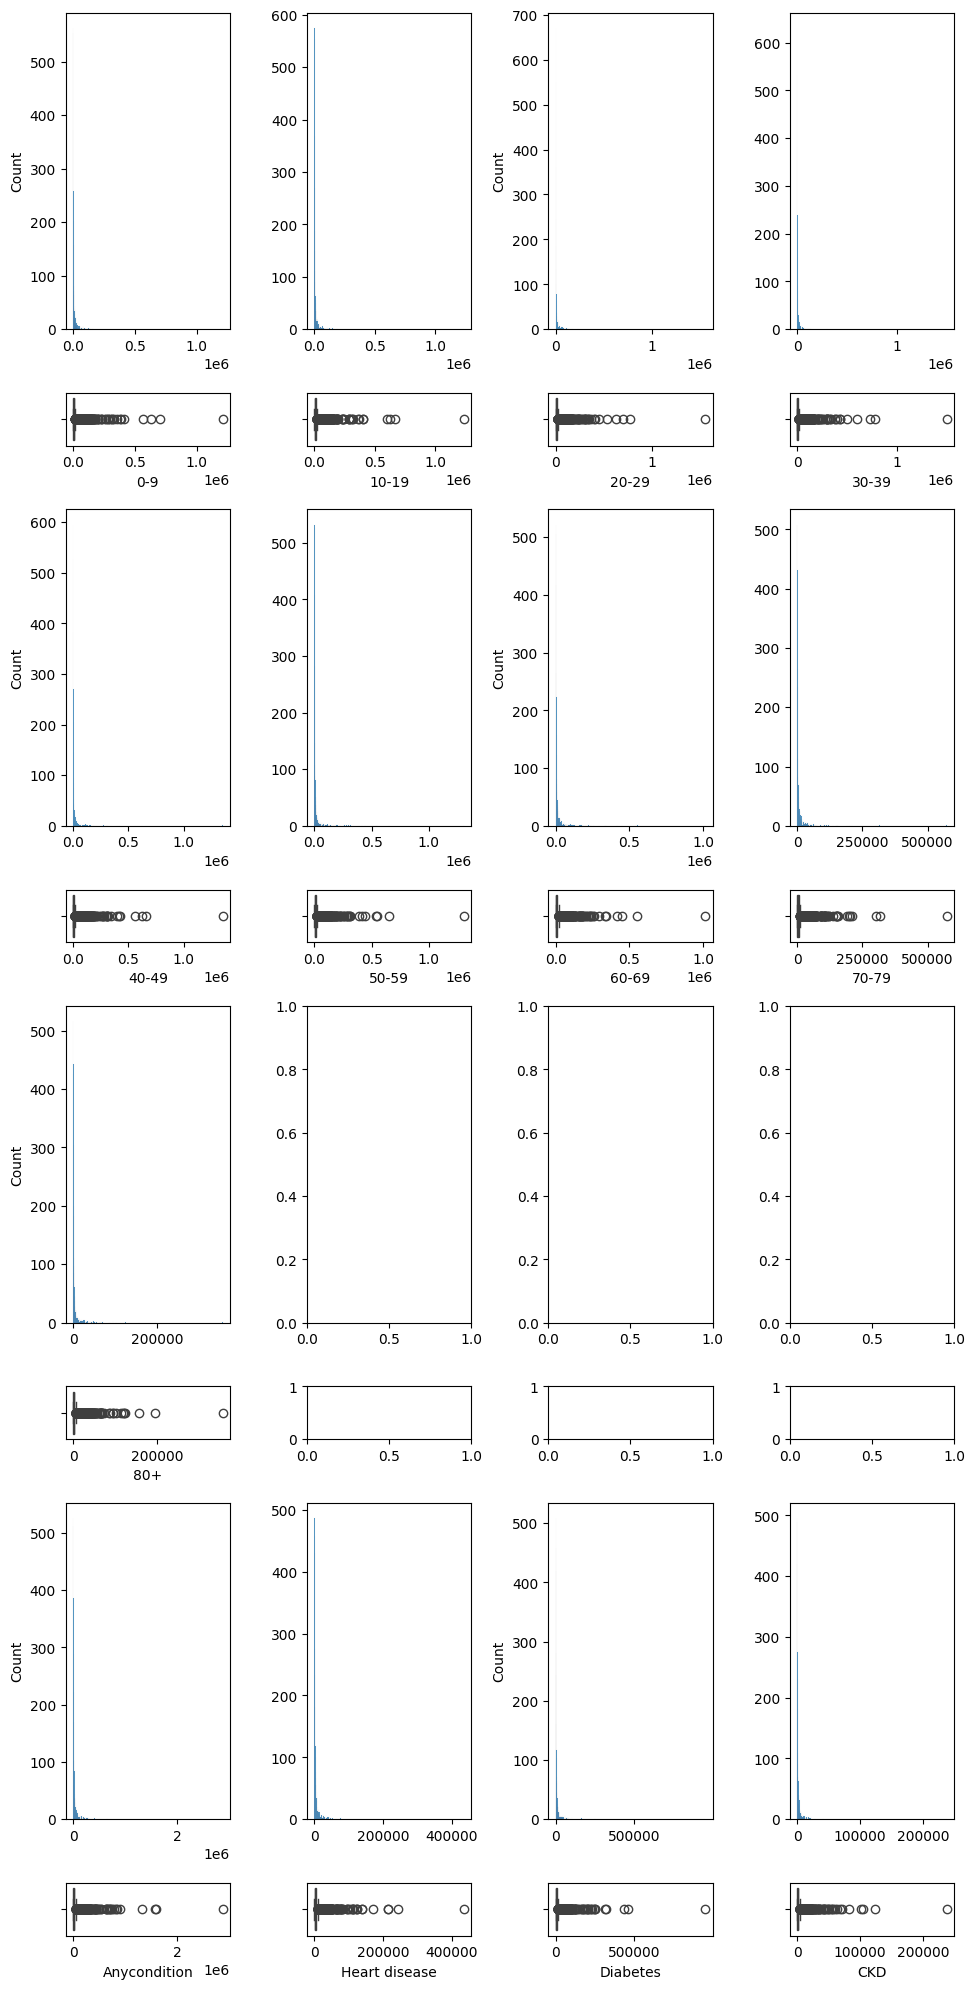

In [ ]:
fig, axis = plt.subplots(8, 4, figsize = (10, 20), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "0-9").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "0-9")
sns.histplot(ax = axis[0, 1], data = df, x = "10-19").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "10-19")
sns.histplot(ax = axis[0, 2], data = df, x = "20-29").set(xlabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "20-29")
sns.histplot(ax = axis[0, 3], data = df, x = "30-39").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = df, x = "30-39")

sns.histplot(ax = axis[2, 0], data = df, x = "40-49").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "40-49")
sns.histplot(ax = axis[2, 1], data = df, x = "50-59").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "50-59")
sns.histplot(ax = axis[2, 2], data = df, x = "60-69").set(xlabel = None)
sns.boxplot(ax = axis[3, 2], data = df, x = "60-69")
sns.histplot(ax = axis[2, 3], data = df, x = "70-79").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 3], data = df, x = "70-79")

sns.histplot(ax = axis[4, 0], data = df, x = "80+").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = df, x = "80+")


sns.histplot(ax = axis[6, 0], data = df, x = "Anycondition").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = df, x = "Anycondition")
sns.histplot(ax = axis[6, 1], data = df, x = "Heart disease").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[7, 1], data = df, x = "Heart disease")
sns.histplot(ax = axis[6, 2], data = df, x = "Diabetes").set(xlabel = None)
sns.boxplot(ax = axis[7, 2], data = df, x = "Diabetes")
sns.histplot(ax = axis[6, 3], data = df, x = "CKD").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[7, 3], data = df, x = "CKD")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



In [ ]:
# hay una distribución alargada lo que hace que los outliers estén muy alejados de la cresta, esto seguramente asociados a zonas geográficas muy pobladas.
# es mejor trabajar con los porcentajes de la población y la prevalencia
df=df0[["0-9 y/o % of total pop", "10-19 y/o % of total pop", "20-29 y/o % of total pop", "30-39 y/o % of total pop", "40-49 y/o % of total pop", "50-59 y/o % of total pop", "60-69 y/o % of total pop", "70-79 y/o % of total pop", "80+ y/o % of total pop","anycondition_prevalence","Heart disease_prevalence","diabetes_prevalence","CKD_prevalence"]]
df = df.rename(columns={"0-9 y/o % of total pop":"0-9%", "10-19 y/o % of total pop":"10-19%", "20-29 y/o % of total pop":"20-29%", "30-39 y/o % of total pop":"30-39%", "40-49 y/o % of total pop":"40-49%", "50-59 y/o % of total pop":"50-59%", "60-69 y/o % of total pop":"60-69%", "70-79 y/o % of total pop":"70-79%", "80+ y/o % of total pop":"80+%"})
df.head()


,0-9%,10-19%,20-29%,30-39%,40-49%,50-59%,60-69%,70-79%,80+%,anycondition_prevalence,Heart disease_prevalence,diabetes_prevalence,CKD_prevalence
0,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,3.622237,47.6,7.9,12.9,3.1
1,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,4.296814,40.2,7.8,12.0,3.2
2,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,4.212049,57.5,11.0,19.7,4.5
3,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,3.504464,51.6,8.6,14.1,3.3
4,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,4.036999,46.3,9.2,13.5,3.4


<Axes: xlabel='CKD_prevalence'>

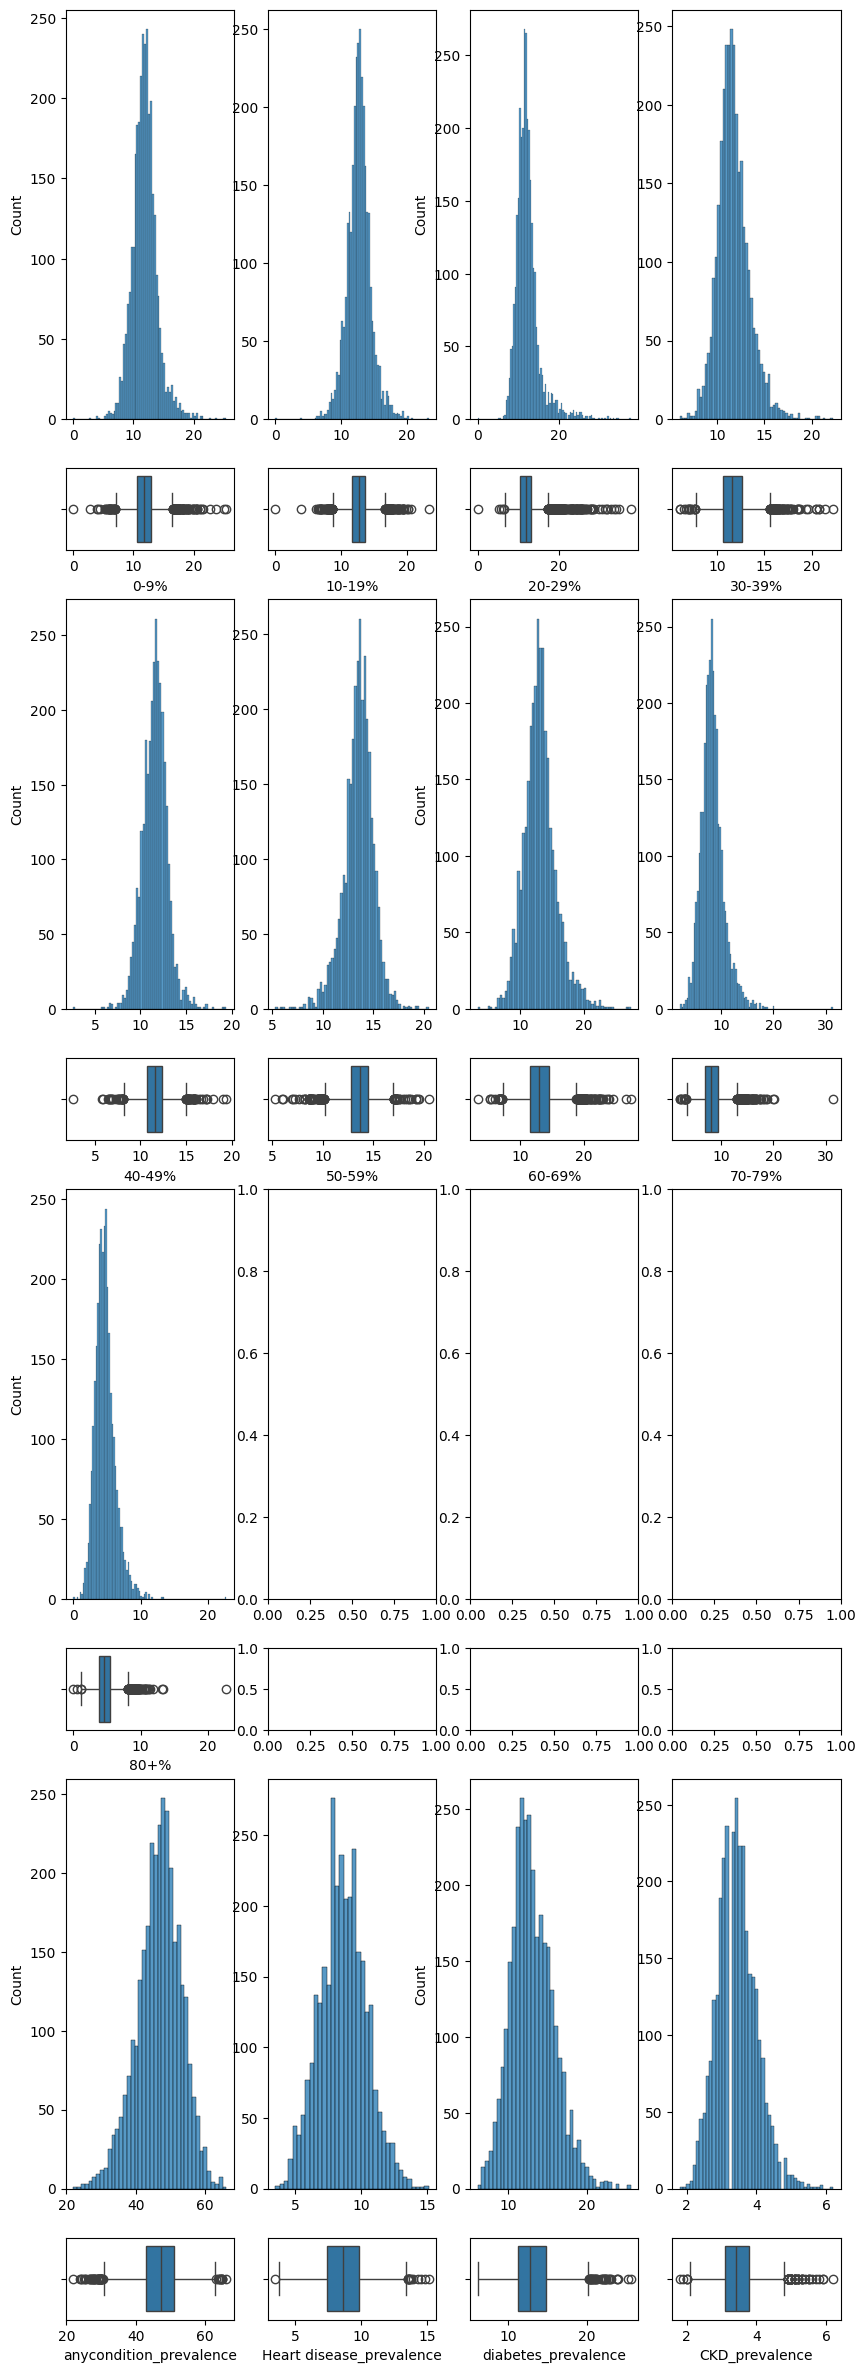

In [39]:
fig, axis = plt.subplots(8, 4, figsize = (10, 30), gridspec_kw={'height_ratios': [5, 1, 5, 1, 5, 1, 5, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "0-9%").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "0-9%")
sns.histplot(ax = axis[0, 1], data = df, x = "10-19%").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "10-19%")
sns.histplot(ax = axis[0, 2], data = df, x = "20-29%").set(xlabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "20-29%")
sns.histplot(ax = axis[0, 3], data = df, x = "30-39%").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = df, x = "30-39%")

sns.histplot(ax = axis[2, 0], data = df, x = "40-49%").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "40-49%")
sns.histplot(ax = axis[2, 1], data = df, x = "50-59%").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "50-59%")
sns.histplot(ax = axis[2, 2], data = df, x = "60-69%").set(xlabel = None)
sns.boxplot(ax = axis[3, 2], data = df, x = "60-69%")
sns.histplot(ax = axis[2, 3], data = df, x = "70-79%").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 3], data = df, x = "70-79%")

sns.histplot(ax = axis[4, 0], data = df, x = "80+%").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = df, x = "80+%")


sns.histplot(ax = axis[6, 0], data = df, x = "anycondition_prevalence").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = df, x = "anycondition_prevalence")
sns.histplot(ax = axis[6, 1], data = df, x = "Heart disease_prevalence").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[7, 1], data = df, x = "Heart disease_prevalence")
sns.histplot(ax = axis[6, 2], data = df, x = "diabetes_prevalence").set(xlabel = None)
sns.boxplot(ax = axis[7, 2], data = df, x = "diabetes_prevalence")
sns.histplot(ax = axis[6, 3], data = df, x = "CKD_prevalence").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[7, 3], data = df, x = "CKD_prevalence")

In [41]:
# ahora si, se ve mejor la distribución.
# con respecto a los outliers, no es conveniente eliminarlos porque son bastantes y en todas las variables
# Revisando la variable objetivo (dependiente), Heart Disease es la que menos outlier tiene
df = df.drop(['anycondition_prevalence','diabetes_prevalence','CKD_prevalence'], axis=1)
df.head()

,0-9%,10-19%,20-29%,30-39%,40-49%,50-59%,60-69%,70-79%,80+%,Heart disease_prevalence
0,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,3.622237,7.9
1,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,4.296814,7.8
2,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,4.212049,11.0
3,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,3.504464,8.6
4,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,4.036999,9.2


## Guardar Dataframe

In [42]:
df.to_csv('df.csv',index=False)

## Análisis de variables multivariante

In [46]:
# traemos primeramente el dataframe para trabajar
LRR =  pd.read_csv('/workspaces/Regularized-Linear-Regression/src/df.csv')
LRR.head()

,0-9%,10-19%,20-29%,30-39%,40-49%,50-59%,60-69%,70-79%,80+%,Heart disease_prevalence
0,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,3.622237,7.9
1,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,4.296814,7.8
2,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,4.212049,11.0
3,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,3.504464,8.6
4,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,4.036999,9.2
